# Importing all the necessary libraries

In [2]:
# Importing libraries for EDA
import numpy as np
import pandas as pd
from sklearn.model_selection import *

# For visualization

import seaborn as sns
import matplotlib.pyplot as plot

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# reading the data from the dataset into a dataframe¶

In [3]:
df = pd.read_csv('cananda_fuel.csv')

In [4]:
df.head()

,Federal organization,Fiscal year,Fleet type,GHG scope,Energy category,Fuel type,Fuel consumption (L),Energy use (GJ),Emissions (kt)
0,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",diesel,2.769540e+05,10607.340110,0.758452
1,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (10%),2.137486e+05,7237.526336,0.445890
2,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (85%),2.506110e+05,6342.964417,0.089167
3,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,gasoline,gasoline,1.747898e+06,61176.418970,4.049443
4,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,liquified petroleum gas,propane,2.697999e+03,68.286366,0.004156


# Data Exploration

In [5]:
df.shape

(1297, 9)

In [6]:
df.dtypes

Federal organization     object
Fiscal year              object
Fleet type               object
GHG scope                 int64
Energy category          object
Fuel type                object
Fuel consumption (L)    float64
Energy use (GJ)         float64
Emissions (kt)          float64
dtype: object

In [7]:
df.columns

Index(['Federal organization', 'Fiscal year', 'Fleet type', 'GHG scope',
       'Energy category', 'Fuel type', 'Fuel consumption (L)',
       'Energy use (GJ)', 'Emissions (kt)'],
      dtype='object')

In [8]:
df.info

<bound method DataFrame.info of                   Federal organization Fiscal year              Fleet type  \
0     Agriculture and Agri-Food Canada     2005-06        on-road vehicles   
1     Agriculture and Agri-Food Canada     2005-06        on-road vehicles   
2     Agriculture and Agri-Food Canada     2005-06        on-road vehicles   
3     Agriculture and Agri-Food Canada     2005-06        on-road vehicles   
4     Agriculture and Agri-Food Canada     2005-06        on-road vehicles   
...                                ...         ...                     ...   
1292                  Transport Canada     2021-22        on-road vehicles   
1293                  Transport Canada     2021-22        on-road vehicles   
1294                  Transport Canada     2021-22  other mobile equipment   
1295                  Transport Canada     2021-22  other mobile equipment   
1296                  Transport Canada     2021-22  other mobile equipment   

      GHG scope                

In [9]:
df.index

RangeIndex(start=0, stop=1297, step=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Federal organization  1297 non-null   object 
 1   Fiscal year           1297 non-null   object 
 2   Fleet type            1297 non-null   object 
 3   GHG scope             1297 non-null   int64  
 4   Energy category       1297 non-null   object 
 5   Fuel type             1297 non-null   object 
 6   Fuel consumption (L)  1297 non-null   float64
 7   Energy use (GJ)       1297 non-null   float64
 8   Emissions (kt)        1297 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 91.3+ KB


In [11]:
df.head()

,Federal organization,Fiscal year,Fleet type,GHG scope,Energy category,Fuel type,Fuel consumption (L),Energy use (GJ),Emissions (kt)
0,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",diesel,2.769540e+05,10607.340110,0.758452
1,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (10%),2.137486e+05,7237.526336,0.445890
2,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (85%),2.506110e+05,6342.964417,0.089167
3,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,gasoline,gasoline,1.747898e+06,61176.418970,4.049443
4,Agriculture and Agri-Food Canada,2005-06,on-road vehicles,1,liquified petroleum gas,propane,2.697999e+03,68.286366,0.004156


In [12]:
df.tail()

,Federal organization,Fiscal year,Fleet type,GHG scope,Energy category,Fuel type,Fuel consumption (L),Energy use (GJ),Emissions (kt)
1292,Transport Canada,2021-22,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (85%),6123.997851,154.998386,0.002179
1293,Transport Canada,2021-22,on-road vehicles,1,gasoline,gasoline,413598.524700,14475.948360,0.958205
1294,Transport Canada,2021-22,other mobile equipment,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",diesel,461260.568800,17666.279790,1.240092
1295,Transport Canada,2021-22,other mobile equipment,1,gasoline,gasoline,18369.011770,642.915412,0.045302
1296,Transport Canada,2021-22,other mobile equipment,1,liquified petroleum gas,propane,696.000022,17.615761,0.001072


In [13]:
df.describe()

,GHG scope,Fuel consumption (L),Energy use (GJ),Emissions (kt)
count,1297.0,1.297000e+03,1297.000000,1.297000e+03
mean,1.0,5.155617e+05,18424.574678,1.252308e+00
std,0.0,1.619654e+06,58674.695013,4.104940e+00
min,1.0,7.230000e-01,0.000839,4.750000e-08
25%,1.0,3.391400e+03,110.282007,5.660748e-03
50%,1.0,3.359712e+04,1140.772320,6.809740e-02
75%,1.0,2.920001e+05,10319.383570,6.756659e-01
max,1.0,1.642902e+07,586852.019200,4.147234e+01


# Missing Values

In [14]:
df.isnull()

,Federal organization,Fiscal year,Fleet type,GHG scope,Energy category,Fuel type,Fuel consumption (L),Energy use (GJ),Emissions (kt)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1292,False,False,False,False,False,False,False,False,False
1293,False,False,False,False,False,False,False,False,False
1294,False,False,False,False,False,False,False,False,False
1295,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

Federal organization    0
Fiscal year             0
Fleet type              0
GHG scope               0
Energy category         0
Fuel type               0
Fuel consumption (L)    0
Energy use (GJ)         0
Emissions (kt)          0
dtype: int64

# EDA for outliers

# colinearity

<Axes: >

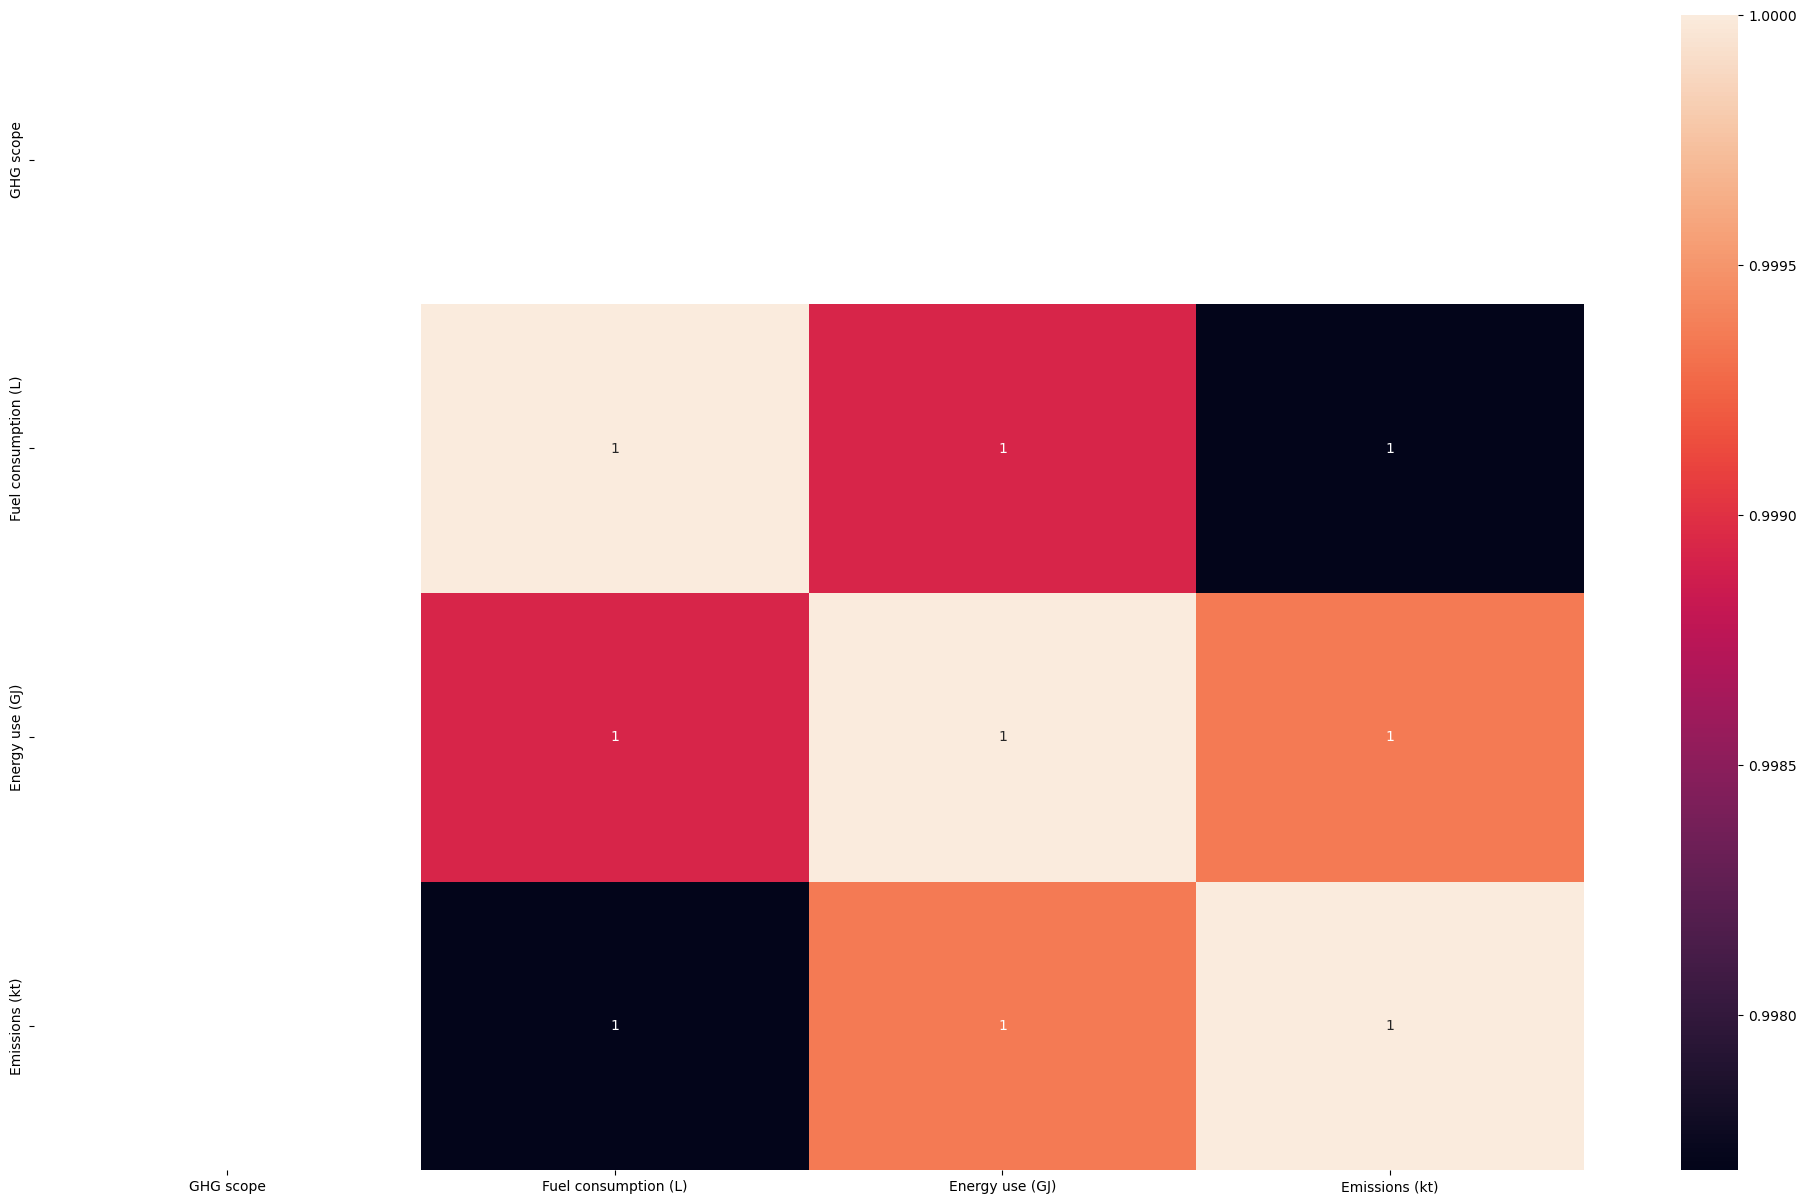

In [16]:
plot.figure(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True)

<Axes: >

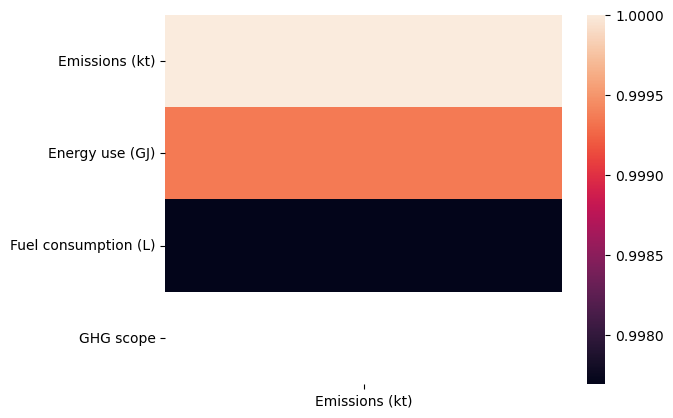

In [17]:
sns.heatmap(df.corr()[['Emissions (kt)']].sort_values(by='Emissions (kt)', ascending=False))


# towards normalization

# 

In [18]:
#to get all the categorical 
columns=df.columns
total_columns=len(columns)
for i in range(0,total_columns, 1):
    print(columns[i])
    print(df[columns[i]].unique())


Federal organization
['Agriculture and Agri-Food Canada' 'Canada Border Services Agency'
 'Canada Revenue Agency' 'Canadian Food Inspection Agency'
 'Canadian Space Agency' 'Correctional Service Canada'
 'Crown-Indigenous Relations and Northern Affairs Canada'
 'Employment and Social Development Canada'
 'Environment and Climate Change Canada' 'Fisheries and Oceans Canada'
 'Health Canada' 'Immigration, Refugees and Citizenship Canada'
 'Indigenous Services Canada'
 'Innovation, Science and Economic Development Canada' 'National Defence'
 'National Research Council Canada' 'Natural Resources Canada'
 'Parks Canada' 'Public Services and Procurement Canada'
 'Royal Canadian Mounted Police' 'Transport Canada'
 'Shared Services Canada' 'Public Safety Canada']
Fiscal year
['2005-06' '2010-11' '2011-12' '2012-13' '2013-14' '2014-15' '2015-16'
 '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22']
Fleet type
['on-road vehicles' 'other mobile equipment' 'aircraft' 'Marine vessels'
 'On-

In [19]:

data=df.drop(df.columns[[0,1]], axis=1)
#df.drop(['A'], axis=1)

# get dummies

In [20]:

a = pd.get_dummies(data['Fleet type'], prefix = "Fleet type")
b = pd.get_dummies(data['Energy category'], prefix = "Energy category")
c = pd.get_dummies(data['Fuel type'], prefix = "Fuel type")


In [21]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,Fleet type,GHG scope,Energy category,Fuel type,Fuel consumption (L),Energy use (GJ),Emissions (kt),Fleet type_Aircraft,Fleet type_Marine Vessels,Fleet type_Marine vessels,...,Fuel type_biodiesel (20%),Fuel type_biodiesel (5%),Fuel type_compressed natural gas,Fuel type_diesel,Fuel type_ethanol-blended gasoline (10%),Fuel type_ethanol-blended gasoline (85%),Fuel type_gasoline,Fuel type_jet fuel,Fuel type_light fuel oil,Fuel type_propane
0,on-road vehicles,1,"fuel oil (1,2,4,5,6, diesel, kerosene)",diesel,2.769540e+05,10607.340110,0.758452,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (10%),2.137486e+05,7237.526336,0.445890,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,on-road vehicles,1,fuels with renewable content,ethanol-blended gasoline (85%),2.506110e+05,6342.964417,0.089167,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,on-road vehicles,1,gasoline,gasoline,1.747898e+06,61176.418970,4.049443,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,on-road vehicles,1,liquified petroleum gas,propane,2.697999e+03,68.286366,0.004156,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
data = data.drop(columns = ['Fleet type', 'Energy category', 'Fuel type'])
data.head()


,GHG scope,Fuel consumption (L),Energy use (GJ),Emissions (kt),Fleet type_Aircraft,Fleet type_Marine Vessels,Fleet type_Marine vessels,Fleet type_On-road vehicles,Fleet type_Other mobile equipment,Fleet type_aircraft,...,Fuel type_biodiesel (20%),Fuel type_biodiesel (5%),Fuel type_compressed natural gas,Fuel type_diesel,Fuel type_ethanol-blended gasoline (10%),Fuel type_ethanol-blended gasoline (85%),Fuel type_gasoline,Fuel type_jet fuel,Fuel type_light fuel oil,Fuel type_propane
0,1,2.769540e+05,10607.340110,0.758452,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,2.137486e+05,7237.526336,0.445890,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.506110e+05,6342.964417,0.089167,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1.747898e+06,61176.418970,4.049443,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.697999e+03,68.286366,0.004156,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# scaling

In [23]:
y = data.loc[:, data.columns == 'Emissions (kt)']
y= pd.DataFrame(y, columns=['Emissions (kt)'])
y

,Emissions (kt)
0,0.758452
1,0.445890
2,0.089167
3,4.049443
4,0.004156
...,...
1292,0.002179
1293,0.958205
1294,1.240092
1295,0.045302


In [24]:
#x_data = data.iloc[: , :-1]
x_data = data.loc[:, data.columns != 'Emissions (kt)']
x_data.columns

Index(['GHG scope', 'Fuel consumption (L)', 'Energy use (GJ)',
       'Fleet type_Aircraft', 'Fleet type_Marine Vessels',
       'Fleet type_Marine vessels', 'Fleet type_On-road vehicles',
       'Fleet type_Other mobile equipment', 'Fleet type_aircraft',
       'Fleet type_on-road vehicles', 'Fleet type_other mobile equipment',
       'Energy category_Fuels with renewable content',
       'Energy category_Gasoline', 'Energy category_Liquified petroleum gas',
       'Energy category_Natural gas', 'Energy category_aviation fuel',
       'Energy category_fuel oil (1,2,4,5,6, diesel, kerosene)',
       'Energy category_fuels with renewable content',
       'Energy category_gasoline', 'Energy category_liquified petroleum gas',
       'Energy category_natural gas', 'Fuel type_aviation gasoline',
       'Fuel type_biodiesel (20%)', 'Fuel type_biodiesel (5%)',
       'Fuel type_compressed natural gas', 'Fuel type_diesel',
       'Fuel type_ethanol-blended gasoline (10%)',
       'Fuel type_et

In [25]:
x_data

,GHG scope,Fuel consumption (L),Energy use (GJ),Fleet type_Aircraft,Fleet type_Marine Vessels,Fleet type_Marine vessels,Fleet type_On-road vehicles,Fleet type_Other mobile equipment,Fleet type_aircraft,Fleet type_on-road vehicles,...,Fuel type_biodiesel (20%),Fuel type_biodiesel (5%),Fuel type_compressed natural gas,Fuel type_diesel,Fuel type_ethanol-blended gasoline (10%),Fuel type_ethanol-blended gasoline (85%),Fuel type_gasoline,Fuel type_jet fuel,Fuel type_light fuel oil,Fuel type_propane
0,1,2.769540e+05,10607.340110,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,2.137486e+05,7237.526336,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,2.506110e+05,6342.964417,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1.747898e+06,61176.418970,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,2.697999e+03,68.286366,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,1,6.123998e+03,154.998386,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1293,1,4.135985e+05,14475.948360,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1294,1,4.612606e+05,17666.279790,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1295,1,1.836901e+04,642.915412,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
from sklearn import preprocessing




scaler = preprocessing.MinMaxScaler()
x_data1 = scaler.fit_transform(x_data)
scaled_df = pd.DataFrame(x_data1, columns=(['GHG scope', 'Fuel consumption (L)', 'Energy use (GJ)',
       'Fleet type_Aircraft', 'Fleet type_Marine Vessels',
       'Fleet type_Marine vessels', 'Fleet type_On-road vehicles',
       'Fleet type_Other mobile equipment', 'Fleet type_aircraft',
       'Fleet type_on-road vehicles', 'Fleet type_other mobile equipment',
       'Energy category_Fuels with renewable content',
       'Energy category_Gasoline', 'Energy category_Liquified petroleum gas',
       'Energy category_Natural gas', 'Energy category_aviation fuel',
       'Energy category_fuel oil (1,2,4,5,6, diesel, kerosene)',
       'Energy category_fuels with renewable content',
       'Energy category_gasoline', 'Energy category_liquified petroleum gas',
       'Energy category_natural gas', 'Fuel type_aviation gasoline',
       'Fuel type_biodiesel (20%)', 'Fuel type_biodiesel (5%)',
       'Fuel type_compressed natural gas', 'Fuel type_diesel',
       'Fuel type_ethanol-blended gasoline (10%)',
       'Fuel type_ethanol-blended gasoline (85%)', 'Fuel type_gasoline',
       'Fuel type_jet fuel', 'Fuel type_light fuel oil', 'Fuel type_propane']))
print(scaled_df)

      GHG scope  Fuel consumption (L)  Energy use (GJ)  Fleet type_Aircraft  \
0           0.0              0.016858         0.018075                  0.0   
1           0.0              0.013010         0.012333                  0.0   
2           0.0              0.015254         0.010808                  0.0   
3           0.0              0.106391         0.104245                  0.0   
4           0.0              0.000164         0.000116                  0.0   
...         ...                   ...              ...                  ...   
1292        0.0              0.000373         0.000264                  0.0   
1293        0.0              0.025175         0.024667                  0.0   
1294        0.0              0.028076         0.030103                  0.0   
1295        0.0              0.001118         0.001096                  0.0   
1296        0.0              0.000042         0.000030                  0.0   

      Fleet type_Marine Vessels  Fleet type_Marine 

In [27]:
y_data = scaler.fit_transform(y)
scaled_y = pd.DataFrame(y_data, columns=(['Emissions (kt)']))

# split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df,scaled_y,test_size = 0.3, random_state=33)

In [44]:
#linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
lr_s = lr.score(x_test, y_test)

0.9990278578852749
0.9992568072949186


In [45]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))

0.8665251034250285
0.7913751206439078
